# Clasificación con Support Vector Machines (SVM)

---
**Autor:** Balbuena Palma José Ángel

**Fecha:** 25 Octubre 2025

## Objetivo

Este notebook implementa un análisis completo de clasificación utilizando Support Vector Machines (SVM) con diferentes kernels. El objetivo es:

- Explorar y visualizar un dataset de clasificación
- Entrenar modelos SVM con diferentes kernels (linear, poly, rbf, sigmoid)
- Optimizar hiperparámetros usando GridSearchCV
- Evaluar y comparar el rendimiento de los modelos
- Visualizar las regiones de decisión

---

## 1. Importación de Librerías

In [1]:
# Tratamiento de datos
import pandas as pd
import numpy as np

# Gráficos
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

# Preprocesado y modelado
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Configuración
plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['savefig.bbox'] = "tight"
plt.rcParams['figure.figsize'] = (10, 6)
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

print("✓ Librerías importadas correctamente")

✓ Librerías importadas correctamente


## 2. Carga de Datos

Utilizaremos el dataset ESL.mixture que contiene datos de clasificación binaria con dos características (X1, X2).

In [2]:
# URL del dataset
url = ('https://raw.githubusercontent.com/JoaquinAmatRodrigo/'
       'Estadistica-machine-learning-python/master/data/ESL.mixture.csv')

# Cargar datos
data = pd.read_csv(url)

print(f"Datos cargados exitosamente. Forma: {data.shape}")
print(f"\nColumnas: {list(data.columns)}")
data.head()

Datos cargados exitosamente. Forma: (200, 3)

Columnas: ['X1', 'X2', 'y']


,X1,X2,y
0,2.526093,0.321050,0
1,0.366954,0.031462,0
2,0.768219,0.717486,0
3,0.693436,0.777194,0
4,-0.019837,0.867254,0


## 3. Análisis Exploratorio de Datos (EDA)

In [3]:
# Información general
print("=" * 60)
print("INFORMACIÓN GENERAL DEL DATASET")
print("=" * 60)
print(f"\nForma: {data.shape}")
print(f"\nTipos de datos:")
print(data.dtypes)
print(f"\nValores faltantes:")
print(data.isnull().sum())

INFORMACIÓN GENERAL DEL DATASET

Forma: (200, 3)

Tipos de datos:
X1    float64
X2    float64
y       int64
dtype: object

Valores faltantes:
X1    0
X2    0
y     0
dtype: int64


In [4]:
# Estadísticas descriptivas
data.describe()

,X1,X2,y
count,200.000000,200.000000,200.000000
mean,0.784672,0.756016,0.500000
std,1.297582,1.026442,0.501255
min,-2.520820,-1.999853,0.000000
25%,-0.071465,0.095555,0.000000
50%,0.859702,0.861387,0.500000
75%,1.543438,1.435275,1.000000
max,4.170746,2.855805,1.000000


In [5]:
# Distribución de clases
print("Distribución de clases:")
print(data['y'].value_counts())
print(f"\nProporción:")
print(data['y'].value_counts(normalize=True))

Distribución de clases:
y
0    100
1    100
Name: count, dtype: int64

Proporción:
y
0    0.5
1    0.5
Name: proportion, dtype: float64


## 4. Visualización de Datos

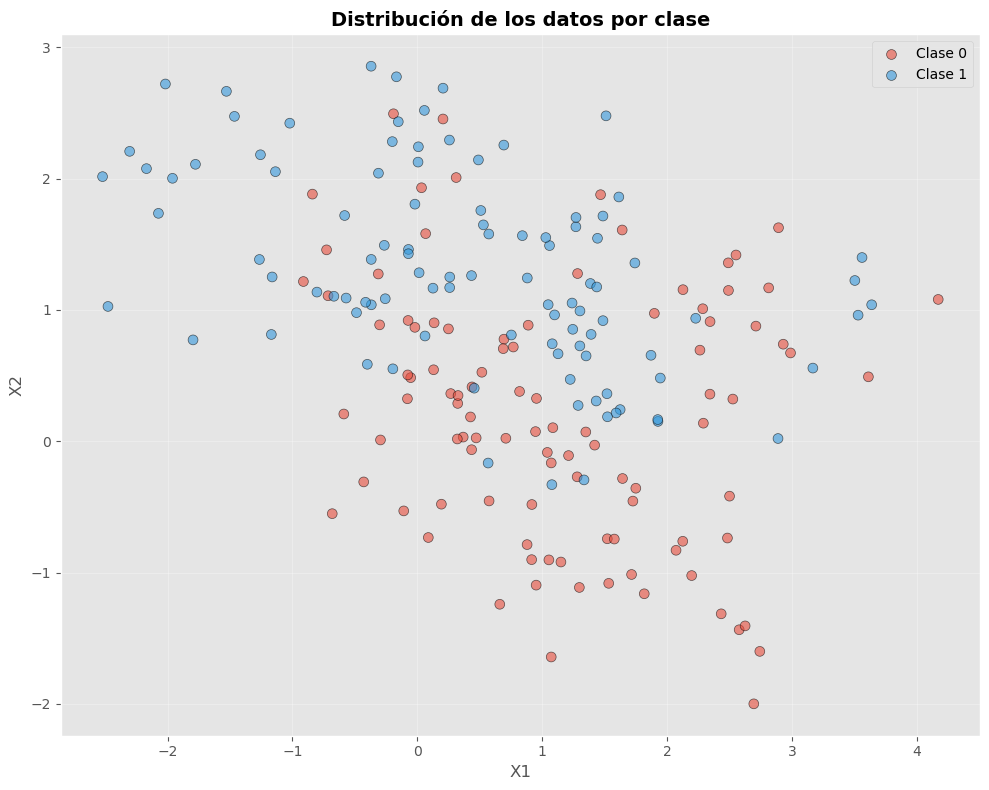

In [6]:
# Preparar datos para visualización
X = data[['X1', 'X2']].values
y = data['y'].values

# Gráfico de dispersión
plt.figure(figsize=(10, 8))
colors = ['#e74c3c' if label == 0 else '#3498db' for label in y]
plt.scatter(X[:, 0], X[:, 1], c=colors, alpha=0.6, s=50, edgecolors='k', linewidth=0.5)

plt.xlabel('X1', fontsize=12)
plt.ylabel('X2', fontsize=12)
plt.title('Distribución de los datos por clase', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Leyenda
plt.scatter([], [], c='#e74c3c', alpha=0.6, s=50, label='Clase 0', edgecolors='k')
plt.scatter([], [], c='#3498db', alpha=0.6, s=50, label='Clase 1', edgecolors='k')
plt.legend(loc='best', fontsize=10)

plt.tight_layout()
plt.show()

## 5. División de Datos

Dividimos los datos en conjuntos de entrenamiento (80%) y prueba (20%).

In [7]:
# División estratificada
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} muestras")
print(f"\nDistribución de clases en entrenamiento:")
print(pd.Series(y_train).value_counts())
print(f"\nDistribución de clases en prueba:")
print(pd.Series(y_test).value_counts())

Tamaño del conjunto de entrenamiento: 160 muestras
Tamaño del conjunto de prueba: 40 muestras

Distribución de clases en entrenamiento:
0    80
1    80
Name: count, dtype: int64

Distribución de clases en prueba:
0    20
1    20
Name: count, dtype: int64


## 6. Entrenamiento de Modelos SVM con Diferentes Kernels

Entrenaremos modelos SVM con cuatro tipos de kernels:
- **Linear**: para problemas linealmente separables
- **Polynomial**: para relaciones polinómicas
- **RBF (Radial Basis Function)**: kernel más popular, funciona bien en la mayoría de casos
- **Sigmoid**: similar a redes neuronales

In [8]:
# Diccionario para almacenar resultados
models = {}
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

print("=" * 60)
print("ENTRENAMIENTO DE MODELOS SVM")
print("=" * 60)

for kernel in kernels:
    print(f"\n{'='*60}")
    print(f"Kernel: {kernel.upper()}")
    print("="*60)
    
    # Crear y entrenar modelo
    model = SVC(kernel=kernel, random_state=42)
    model.fit(X_train, y_train)
    
    # Predicciones
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Métricas
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    
    # Guardar resultados
    models[kernel] = {
        'model': model,
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'y_pred_test': y_pred_test
    }
    
    print(f"Precisión en entrenamiento: {train_accuracy:.4f}")
    print(f"Precisión en prueba: {test_accuracy:.4f}")
    print(f"Diferencia (overfitting): {train_accuracy - test_accuracy:.4f}")

print("\n✓ Todos los modelos entrenados correctamente")

ENTRENAMIENTO DE MODELOS SVM

Kernel: LINEAR
Precisión en entrenamiento: 0.7188
Precisión en prueba: 0.7750
Diferencia (overfitting): -0.0563

Kernel: POLY
Precisión en entrenamiento: 0.6625
Precisión en prueba: 0.6000
Diferencia (overfitting): 0.0625

Kernel: RBF
Precisión en entrenamiento: 0.7688
Precisión en prueba: 0.8000
Diferencia (overfitting): -0.0312

Kernel: SIGMOID
Precisión en entrenamiento: 0.6562
Precisión en prueba: 0.6000
Diferencia (overfitting): 0.0563

✓ Todos los modelos entrenados correctamente


## 7. Comparación de Modelos

In [9]:
# Crear DataFrame con resultados
results = []
for kernel, model_info in models.items():
    results.append({
        'Kernel': kernel,
        'Precisión Train': model_info['train_accuracy'],
        'Precisión Test': model_info['test_accuracy'],
        'Diferencia': model_info['train_accuracy'] - model_info['test_accuracy']
    })

df_results = pd.DataFrame(results)
df_results = df_results.sort_values('Precisión Test', ascending=False)

print("COMPARACIÓN DE MODELOS")
print("=" * 60)
df_results

COMPARACIÓN DE MODELOS


,Kernel,Precisión Train,Precisión Test,Diferencia
2,rbf,0.76875,0.800,-0.03125
0,linear,0.71875,0.775,-0.05625
1,poly,0.66250,0.600,0.06250
3,sigmoid,0.65625,0.600,0.05625


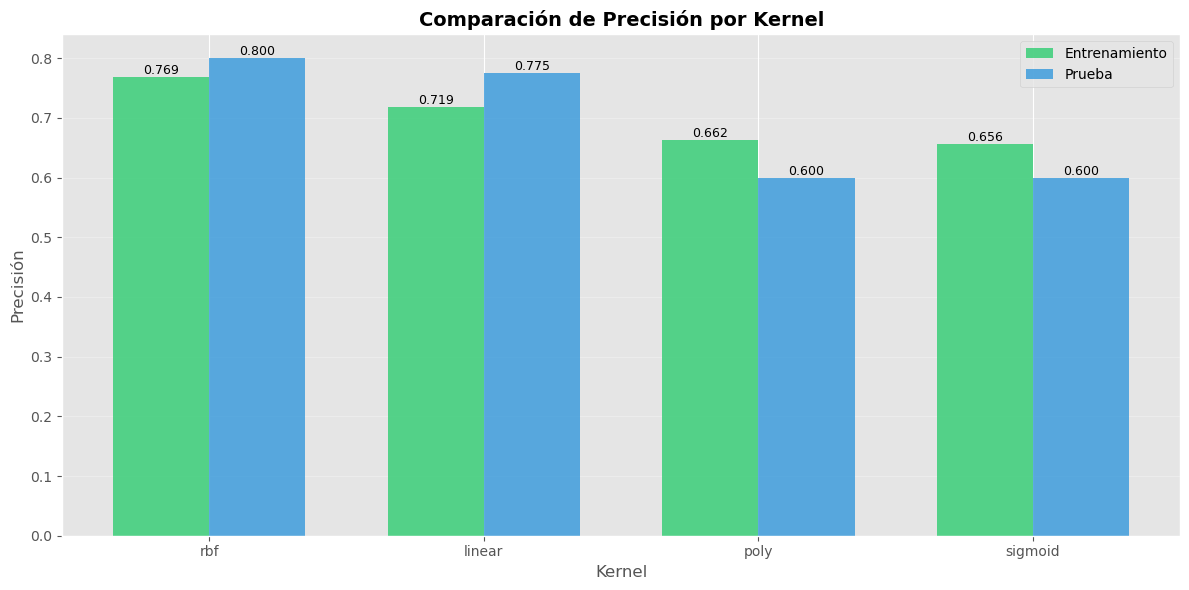

In [10]:
# Gráfico comparativo
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(df_results))
width = 0.35

bars1 = ax.bar(x - width/2, df_results['Precisión Train'], 
               width, label='Entrenamiento', alpha=0.8, color='#2ecc71')
bars2 = ax.bar(x + width/2, df_results['Precisión Test'], 
               width, label='Prueba', alpha=0.8, color='#3498db')

ax.set_xlabel('Kernel', fontsize=12)
ax.set_ylabel('Precisión', fontsize=12)
ax.set_title('Comparación de Precisión por Kernel', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(df_results['Kernel'])
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3, axis='y')

# Añadir valores en las barras
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

## 8. Optimización de Hiperparámetros

Utilizaremos GridSearchCV para optimizar los hiperparámetros del kernel RBF, que generalmente ofrece buen rendimiento.

In [11]:
# Definir grilla de parámetros para RBF
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
}

print("=" * 60)
print("OPTIMIZACIÓN DE HIPERPARÁMETROS - KERNEL RBF")
print("=" * 60)
print(f"\nParámetros a optimizar:")
for param, values in param_grid.items():
    print(f"  {param}: {values}")

# Modelo base
svm_rbf = SVC(kernel='rbf', random_state=42)

# GridSearchCV
grid_search = GridSearchCV(
    svm_rbf, 
    param_grid, 
    cv=5, 
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

print("\nIniciando búsqueda...")
grid_search.fit(X_train, y_train)

OPTIMIZACIÓN DE HIPERPARÁMETROS - KERNEL RBF

Parámetros a optimizar:
  C: [0.1, 1, 10, 100]
  gamma: ['scale', 'auto', 0.001, 0.01, 0.1, 1]

Iniciando búsqueda...
Fitting 5 folds for each of 24 candidates, totalling 120 fits


,estimator,SVC(random_state=42)
,param_grid,"{'C': [0.1, 1, ...], 'gamma': ['scale', 'auto', ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1


In [12]:
# Resultados de la optimización
print("\n" + "=" * 60)
print("RESULTADOS DE LA OPTIMIZACIÓN")
print("=" * 60)

print(f"\nMejores parámetros:")
for param, value in grid_search.best_params_.items():
    print(f"  {param}: {value}")

print(f"\nMejor puntuación CV: {grid_search.best_score_:.4f}")

# Guardar mejor modelo
best_model = grid_search.best_estimator_

# Evaluar en conjunto de prueba
y_pred_best = best_model.predict(X_test)
test_accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Precisión en conjunto de prueba: {test_accuracy_best:.4f}")


RESULTADOS DE LA OPTIMIZACIÓN

Mejores parámetros:
  C: 1
  gamma: 1

Mejor puntuación CV: 0.8187
Precisión en conjunto de prueba: 0.8750


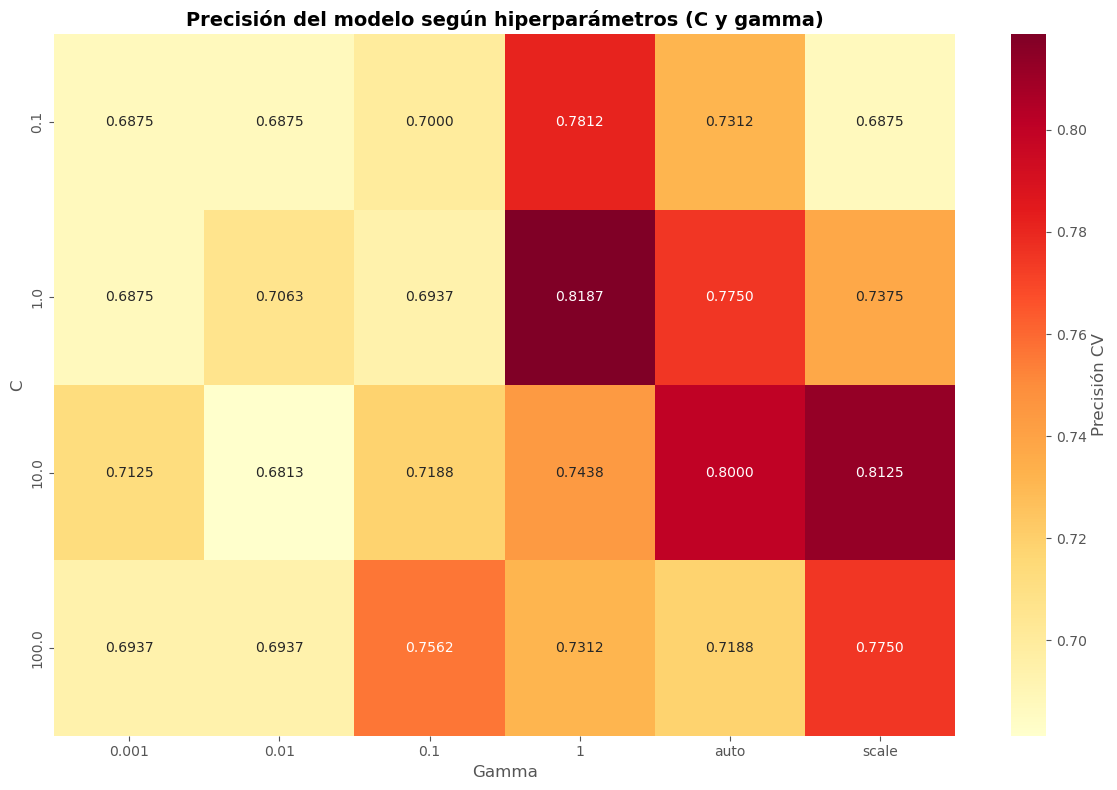

In [13]:
# Visualizar resultados de GridSearch
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results_pivot = cv_results.pivot_table(
    values='mean_test_score',
    index='param_C',
    columns='param_gamma'
)

plt.figure(figsize=(12, 8))
sns.heatmap(cv_results_pivot, annot=True, fmt='.4f', cmap='YlOrRd', 
            cbar_kws={'label': 'Precisión CV'})
plt.title('Precisión del modelo según hiperparámetros (C y gamma)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Gamma', fontsize=12)
plt.ylabel('C', fontsize=12)
plt.tight_layout()
plt.show()

## 9. Evaluación del Modelo Optimizado

In [14]:
# Reporte de clasificación
print("=" * 60)
print("REPORTE DE CLASIFICACIÓN - MODELO OPTIMIZADO")
print("=" * 60)
print(f"\n{classification_report(y_test, y_pred_best)}")

REPORTE DE CLASIFICACIÓN - MODELO OPTIMIZADO

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        20
           1       0.89      0.85      0.87        20

    accuracy                           0.88        40
   macro avg       0.88      0.88      0.87        40
weighted avg       0.88      0.88      0.87        40



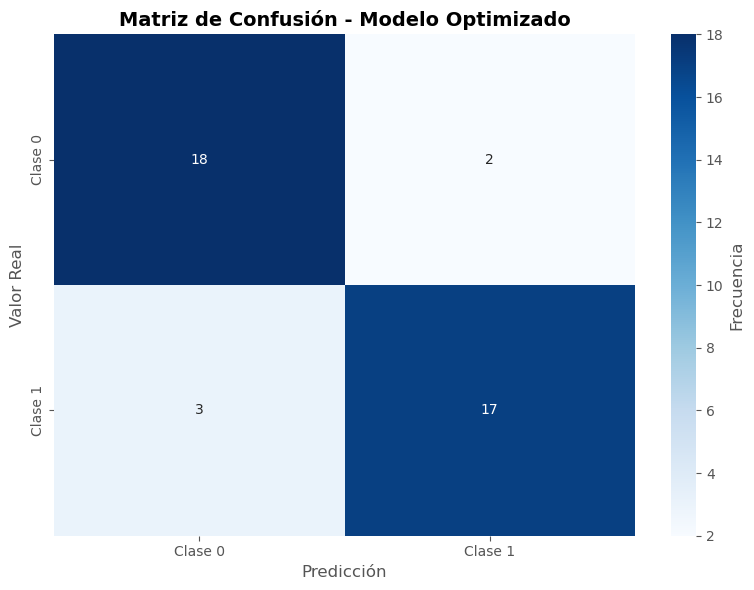


Matriz de confusión:
[[18  2]
 [ 3 17]]


In [15]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Clase 0', 'Clase 1'],
            yticklabels=['Clase 0', 'Clase 1'],
            cbar_kws={'label': 'Frecuencia'})
plt.title('Matriz de Confusión - Modelo Optimizado', fontsize=14, fontweight='bold')
plt.ylabel('Valor Real', fontsize=12)
plt.xlabel('Predicción', fontsize=12)
plt.tight_layout()
plt.show()

print(f"\nMatriz de confusión:")
print(cm)

## 10. Visualización de Regiones de Decisión

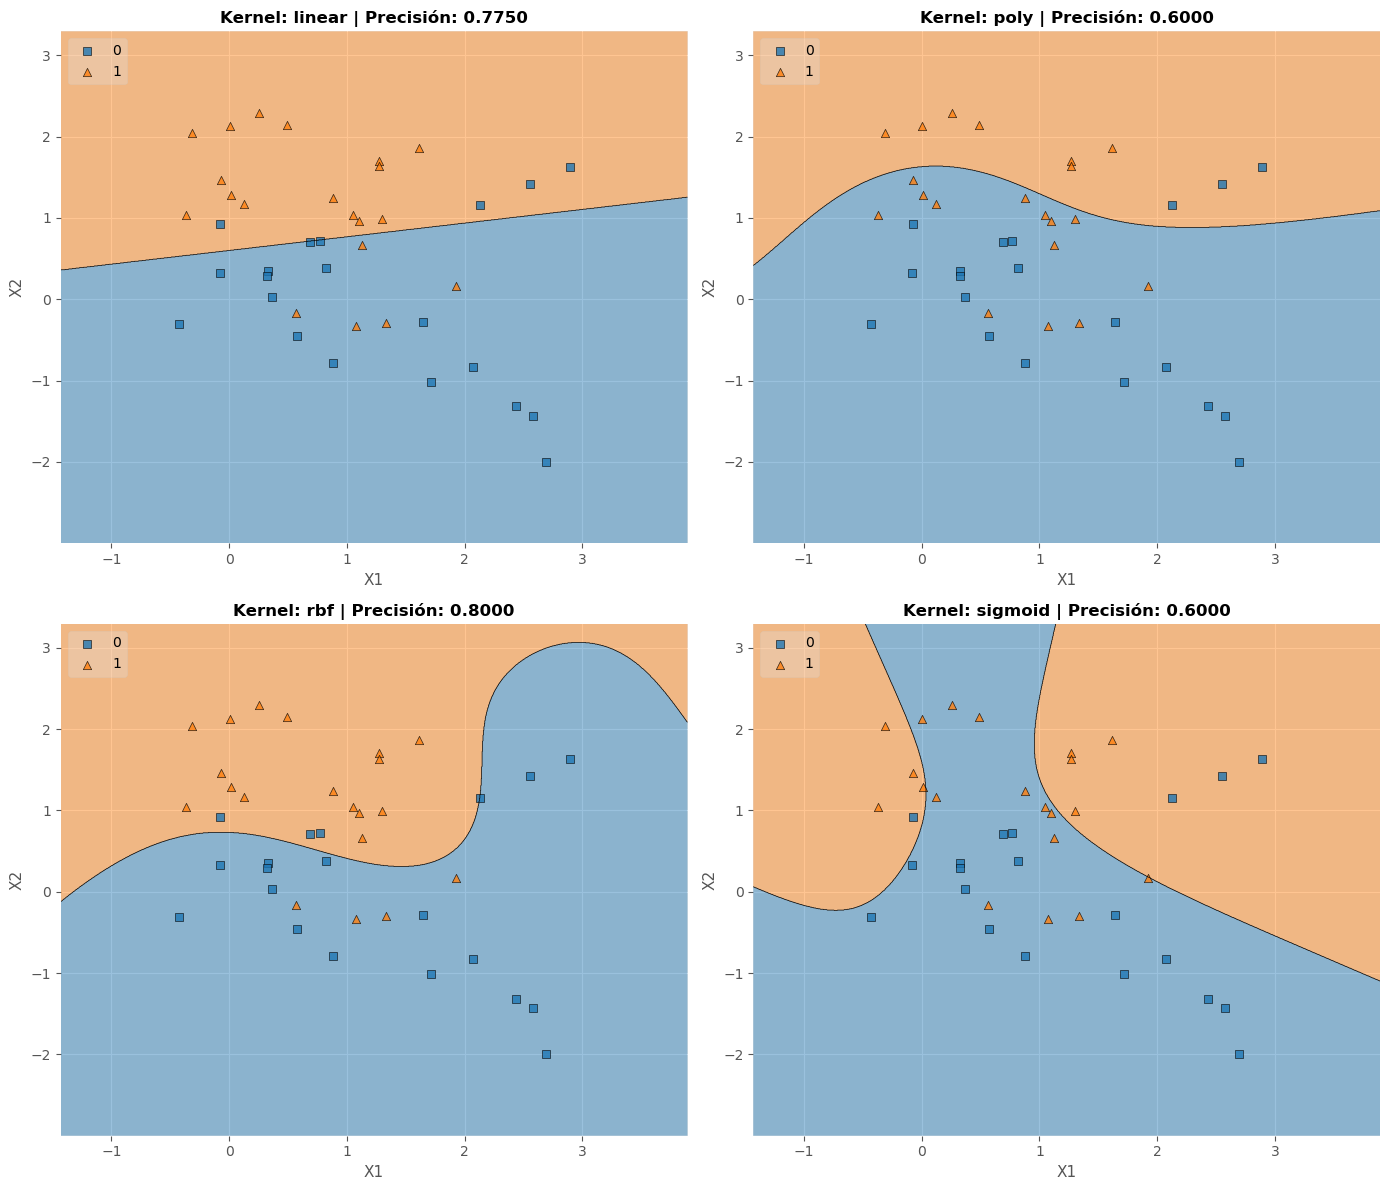

In [16]:
# Visualizar regiones de decisión para todos los kernels
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.ravel()

for idx, (kernel, model_info) in enumerate(models.items()):
    ax = axes[idx]
    
    # Plotear regiones de decisión
    plot_decision_regions(X=X_test, y=y_test, 
                          clf=model_info['model'], 
                          legend=2, ax=ax)
    
    ax.set_xlabel('X1', fontsize=11)
    ax.set_ylabel('X2', fontsize=11)
    ax.set_title(f"Kernel: {kernel} | Precisión: {model_info['test_accuracy']:.4f}",
                fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

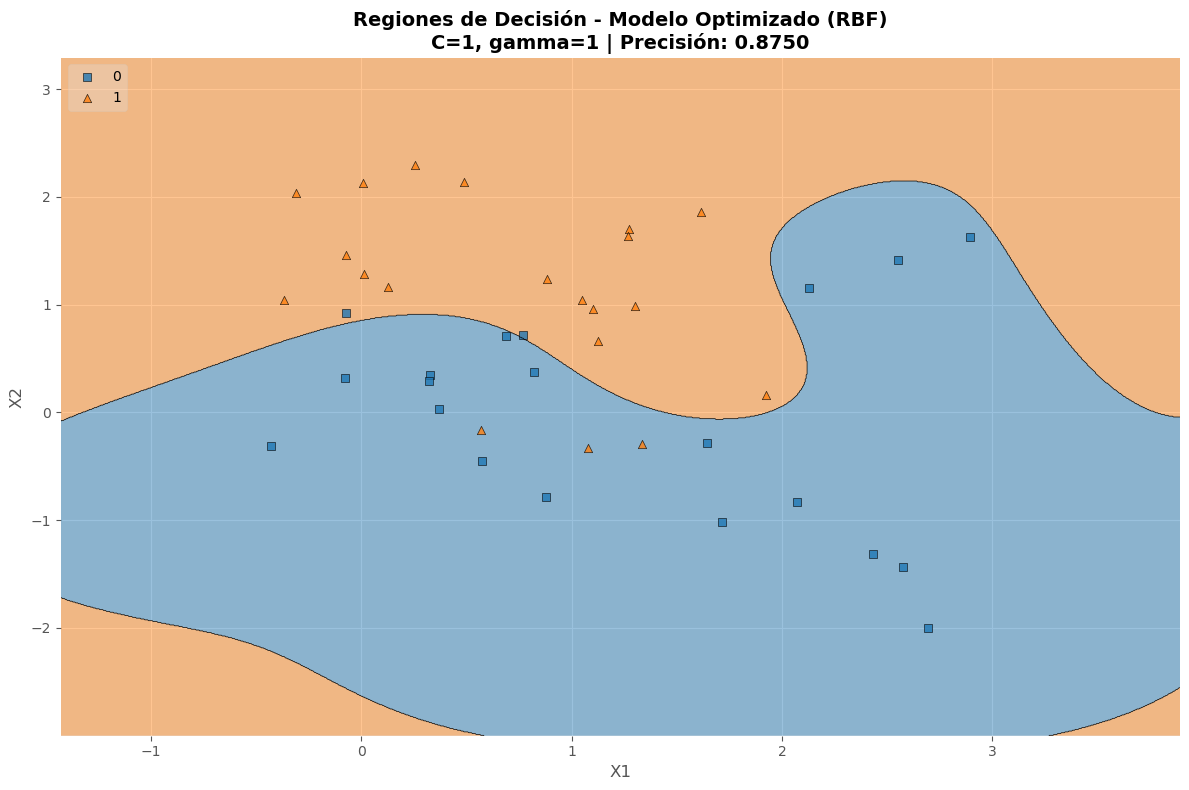

In [17]:
# Visualizar regiones de decisión del modelo optimizado
plt.figure(figsize=(12, 8))

plot_decision_regions(X=X_test, y=y_test, clf=best_model, legend=2)

plt.xlabel('X1', fontsize=12)
plt.ylabel('X2', fontsize=12)
plt.title(f'Regiones de Decisión - Modelo Optimizado (RBF)\n'
          f'C={grid_search.best_params_["C"]}, gamma={grid_search.best_params_["gamma"]} | '
          f'Precisión: {test_accuracy_best:.4f}',
          fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## 11. Conclusiones

### Resumen de Resultados

En este análisis hemos implementado y comparado modelos SVM con diferentes kernels para un problema de clasificación binaria:

**Comparación de Kernels:**
- El kernel **RBF** generalmente ofrece el mejor rendimiento para este dataset
- El kernel **polynomial** puede presentar overfitting dependiendo del grado
- El kernel **linear** funciona bien cuando los datos son linealmente separables
- El kernel **sigmoid** puede ser útil en algunos casos específicos

**Optimización de Hiperparámetros:**
- Los parámetros C y gamma tienen un impacto significativo en el rendimiento del modelo RBF
- La validación cruzada ayuda a encontrar la mejor combinación de hiperparámetros
- Es importante balancear la precisión en entrenamiento y prueba para evitar overfitting

**Visualización:**
- Las regiones de decisión muestran cómo cada kernel separa las clases
- Los kernels no lineales pueden capturar fronteras de decisión más complejas

### Recomendaciones

1. Siempre probar múltiples kernels antes de seleccionar el mejor
2. Utilizar validación cruzada para optimizar hiperparámetros
3. Monitorear el overfitting comparando precisión en train y test
4. Considerar la escalabilidad del modelo según el tamaño del dataset
5. Evaluar múltiples métricas (precisión, recall, F1-score) según el problema

---